<a href="https://colab.research.google.com/github/catree42/FiveNeck/blob/main/FiveNecks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### SKKU AI 실무 교육과정 파이썬 수업 과제  
# 오목 프로그램 만들기  
### StarUML로 ClassDiagram 만들고 이에 따라 코딩했다.


#Class Diagram

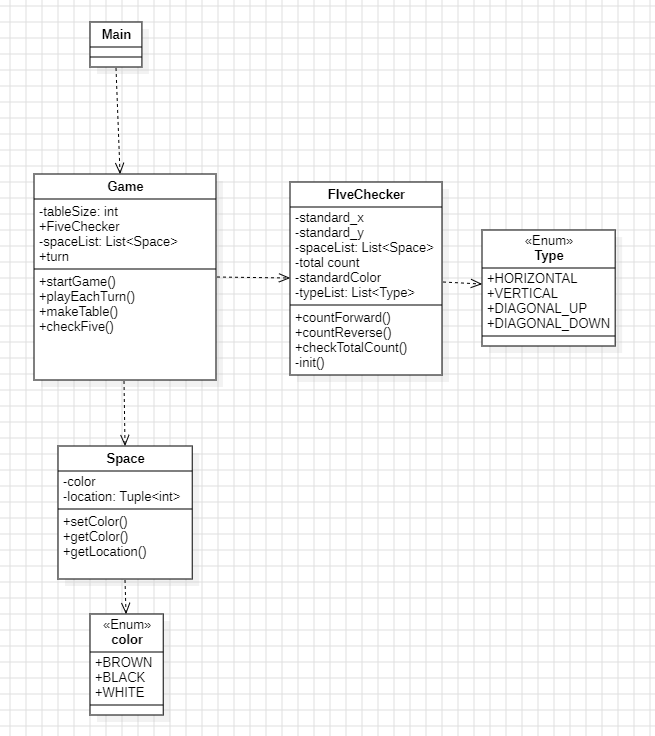

#클래스 설명

##Space :
바둑판 전체 중 한 칸을 담당하는 클래스이다.
color 변수는 검은색과 흰색의 바둑알 색깔과 갈색의 바둑판 색깔의 값을 가지며 한 칸의 상태를 나타낸다.
  

##FiveChecker :  
놓을 돌을 기준으로 오목이 됐는지에 대한 검사를 담당하는 클래스이다.  
바둑알을 놓을 때마다 검사가 진행된다.  
  
검사는 가로, 세로, 정방향 대각선, 역방향 대각선 총 4가지의 경로 검사로 이루어진다.  
  
각 검사에서는 앞방향과 뒷방향의 이어지는 돌의 색깔을 검사한다. 이어지는 같은 색깔의 돌들의 수와 기준돌을 합해 5가 넘으면 오목 성공이다. 성공하면 True를 반환한다.
  

##Game :  
사용자의 입력을 받고 위 클래스들의 객체를 생성해 게임에 진행을 담당하는 함수이다.  
한 턴 씩 진행하고 매 턴마다 오목 검사를 하며, 오목 성공일 경우 승자 발표 후 게임을 종료한다. 오목 성공이 아닐 경우 게임을 계속 진행한다.

## 이 외에 Enum classes
오타로 인한 에러 발생을 방지하기 위해 색깔값과 검사 경로값을 Color, Type Enum 클래스로 지정했다.




##예외처리  

1. 오목판의 범위를 초과하는 인덱스에 돌을 두려고 입력한 경우 : 해당 턴에 사용자에게 다시 입력을 받는다.

2. 이미 돌이 놓아진 칸에 중복하여 돌을 두려고 입력한 경우 : 해당 턴에 사용자에게 다시 입력을 받는다.  

3. 이 외에 시스템적으로 오목판 범위를 초과하는 인덱스에 접근한 경우

    위 경우들에 대한 예외처리를 하였다.  

###예외처리 1) 오목판 범위 초과  

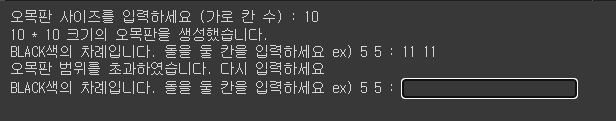

### 예외처리 2) 중복칸 시도  

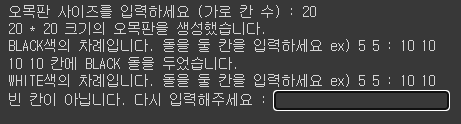

## 결과

예시1 ) Black 가로 오목 결과

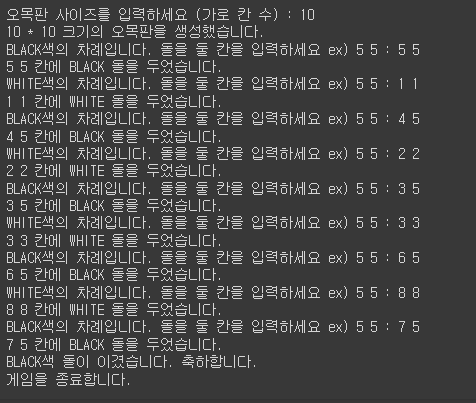

예시2 ) WHITE 세로로 오목 결과

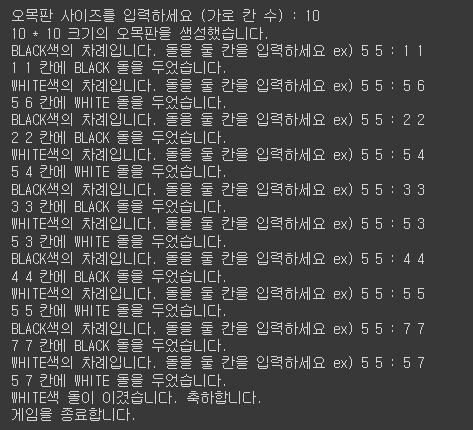

예시3 ) BLACK 정방향 대각선 오목 결과

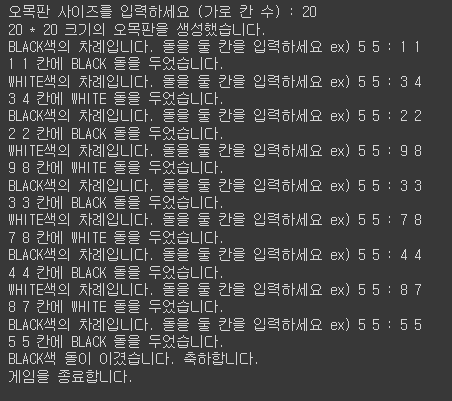



예시4) WHITE 역방향 대각선 오목 결과

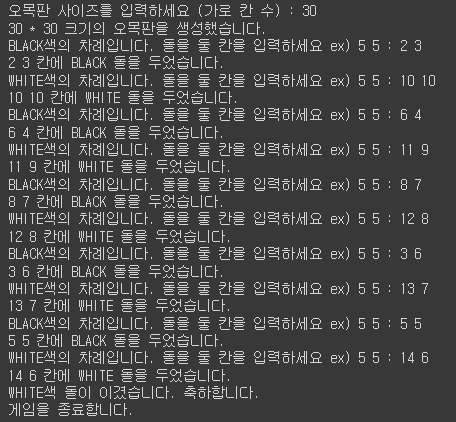



In [3]:
from enum import Enum, auto

class Color(Enum) :
    BROWN = auto()
    BLACK = auto()
    WHITE = auto()

class Type(Enum) :
    HORIZONTAL = auto()
    VERTICAL = auto()
    DIAGONAL_UP = auto()
    DIAGONAL_DOWN = auto()

In [32]:
class Space :
    def __init__(self, x, y) :
        self.__color = Color.BROWN
        self.__x = x
        self.__y = y

    @property
    def color(self) :
        return self.__color

    @color.setter
    def color(self, turn) :
        while(True) :
            try :
                if self.__color != Color.BROWN :
                    raise
                else :
                    self.__color = turn
                    print("%d %d 칸에 %s 돌을 두었습니다." % (self.__x, self.__y, self.__color.name))
                    break
            except :
                x,y = input('빈 칸이 아닙니다. 다시 입력해주세요 : ').split()
                self.__x = int(x)
                self.__y = int(y)
                break

        return self

    @property
    def x(self) :
        return self.__x

    @property
    def y(self) :
        return self.__y

In [67]:
class FiveChecker () :
    CONST_MAX = 4
    def __init__(self, x, y, spaceList, turn) :
        self.__standardX = x
        self.__standardY = y
        self.__spaceList = spaceList
        self.__totalCount = 0
        self.__standardColor = turn
        self.__typeList = [Type.HORIZONTAL, Type.VERTICAL, Type.DIAGONAL_UP, Type.DIAGONAL_DOWN]

    def countForward(self, type) -> int :
        # type 별로 작성하셈
        # count = 0 로 리셋하셈
        # IndextError 바둑판 크기를 초과하는 index에 접근 예외처리
        try :
            count = 0
            if type == Type.HORIZONTAL :    # 가로
                for i in range(self.CONST_MAX) :
                    if self.__spaceList[self.__standardX + (i+1)][self.__standardY].color == self.__standardColor :
                        count += 1
                    else : # 한 칸 이동한 칸의 색깔이 기준점 색과 다를 경우
                        break

            if type == Type.VERTICAL :  # 세로
                for i in range(self.CONST_MAX) :
                    if self.__spaceList[self.__standardX][self.__standardY + (i+1)].color == self.__standardColor :
                        count += 1
                    else : # 한 칸 이동한 칸의 색깔이 기준점 색과 다를 경우
                        break

            if type == Type.DIAGONAL_UP :   # 정방향 대각선
                for i in range(self.CONST_MAX) :
                    if self.__spaceList[self.__standardX + (i+1)][self.__standardY + (i+1)].color == self.__standardColor :
                        count += 1
                    else : # 한 칸 이동한 칸의 색깔이 기준점 색과 다를 경우
                        break

            if type == Type.DIAGONAL_DOWN :  # 역방향 대각선
                for i in range(self.CONST_MAX) :
                    if self.__spaceList[self.__standardX + (i+1)][self.__standardY - (i+1)].color == self.__standardColor :
                        count += 1
                    else : # 한 칸 이동한 칸의 색깔이 기준점 색과 다를 경우
                        break

            return count

        except  IndexError :
            print('Out of Index Error 잡음')

        #return count

    def countReverse(self, type) -> int :
        # type 별로 작성하셈
        # count = 0 로 리셋하셈

        try :
            count = 0
            if type == Type.HORIZONTAL :
                for i in range(self.CONST_MAX) :
                    if self.__spaceList[self.__standardX - (i+1)][self.__standardY].color == self.__standardColor :
                        count += 1
                    else : # 한 칸 이동한 칸의 색깔이 기준점 색과 다를 경우
                        break

            if type == Type.VERTICAL :  # 세로
                for i in range(self.CONST_MAX) :
                    if self.__spaceList[self.__standardX][self.__standardY - (i+1)].color == self.__standardColor :
                        count += 1
                    else : # 한 칸 이동한 칸의 색깔이 기준점 색과 다를 경우
                        break

            if type == Type.DIAGONAL_UP :   # 정방향 대각선
                for i in range(self.CONST_MAX) :
                    if self.__spaceList[self.__standardX - (i+1)][self.__standardY - (i+1)].color == self.__standardColor :
                        count += 1
                    else : # 한 칸 이동한 칸의 색깔이 기준점 색과 다를 경우
                        break

            if type == Type.DIAGONAL_DOWN :  # 역방향 대각선
                for i in range(self.CONST_MAX) :
                    if self.__spaceList[self.__standardX - (i+1)][self.__standardY + (i+1)].color == self.__standardColor :
                        count += 1
                    else : # 한 칸 이동한 칸의 색깔이 기준점 색과 다를 경우
                        break

            return count

        except  IndexError :
            print('Out of Index Error 잡음')

        #return count

    def checkTotalCount(self) -> bool:
        for type in self.__typeList :
            forwordCount = self.countForward(type)
            reverseCount = self.countReverse(type)
            #print(str(forwordCount) + ', ' + str(reverseCount))
            if 1 +forwordCount + reverseCount >= 5 :
                return True
            else :
                continue
        return False


In [73]:
class Game :

    def startGame(self) :
        size = int(input('오목판 사이즈를 입력하세요 (가로 칸 수) : '))
        return size

    def makeSpaceList(self, size) : # SpaceList means Table(오목판), 한 칸은 Space임
        try :

            spaceList = []
            for i in range(size) :
                space = []
                for j in range(size) :
                    space.append(Space(i,j))
                spaceList.append(space)
            # spaceList = [[] ]

            # for i in range(size) :
            #     for j in range(size) :
            #         spaceList[i][j] = Space(i,j)

            print('%d * %d 크기의 오목판을 생성했습니다.' % (size,size))
            return spaceList


        except Exception as e :
            print(e)


    def playEachTurn(self, turn, spaceList)  :
        isEnd = False
    # Color turn
        while(True) :
            x, y = input(turn.name + '색의 차례입니다. 돌을 둘 칸을 입력하세요 ex) 5 5 : ').split()
            x = int(x)
            y = int(y)

            try :
                fiveChecker = FiveChecker(x,y,spaceList,turn)
                spaceList[x][y].color = turn

                if fiveChecker.checkTotalCount() == True :
                    print(turn.name + '색 돌이 이겼습니다. 축하합니다.')
                    isEnd = True
                else :
                    if turn == Color.BLACK :
                        turn = Color.WHITE
                    elif turn == Color.WHITE :
                        turn = Color.BLACK
                break

            except IndexError as e :
                print('오목판 범위를 초과하였습니다. 다시 입력하세요')
                continue

        return turn, spaceList, isEnd






In [76]:
 # 해당 셀 빨간 줄 뜨는데 실행하면 동작합니다...
 game = Game()


while(True) :

    size = game.startGame()


    spaceList = game.makeSpaceList(size)

    turn = Color.BLACK

    while(True) :
        turn, spaceList,isEnd = game.playEachTurn(turn, spaceList)
        if isEnd == True :
            print('게임을 종료합니다.')
            break
        # for i in range(size) :
        #     for j in range(size) :
        #         print(str(spaceList[i][j].x) + ',' + str(spaceList[i][j].y) + spaceList[i][j].color.name)

    break




KeyboardInterrupt: Interrupted by user